# Energie de surface de ZnO

## Structure du matériaux

Le composé ZnO cristallise dans les conditions de température et de pression ambiantes dans un réseau hexagonal; la maille conventionnelle est donc double, et le motif la maille primitive comporte deux atomes.
Sa structure, dite "Wurtzite", est reproduite dans la figure ci-dessous.
Ses paramètres de mailles sont $a = b = 3.25$ $\angstrom$ et $c = 5.20$ $\angstrom$; les angles en présence sont $(\overrightarrow{a},\overrightarrow{b}) = 120\,^\circ$ et $(\overrightarrow{a},\overrightarrow{c}) = (\overrightarrow{b},\overrightarrow{c}) = 90\,^\circ$.
On rappelle que le réseau de Bravais hexagonal est simple, il porte un n\oe ud par maille.

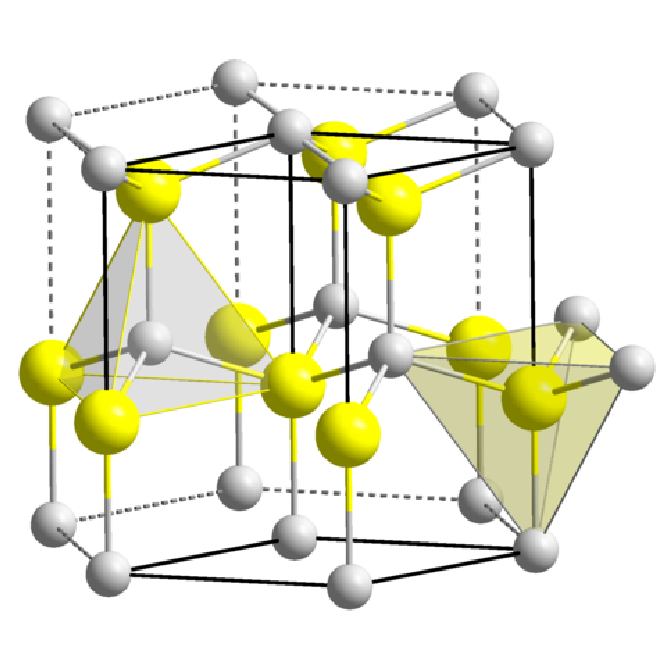
>Représentation schématique de la structure Wurtzite du ZnO (sphères jaunes : Zn, sphères grises : O).
La maille (primitive) hexagonale est représentée par le contour noir (on remarquera que sa base forme non pas un hexagone mais un losange).
Les tétraèdres de coordination des deux types de site sont figurés à titre indicatif.


## Edifice cristallin 3D

### Multiplicité de la maille conventionnelle

Montrer que la maille hexagonale du ZnO est double à partir de la masse volumique du ZnO : $\rho_\mathrm{ZnO} = 5.61$ g/cm$^{3}$.
On utilisera les masses atomiques suivantes exprimées en unité atomique : 
- $m_\mathrm{Zn} = 65.38$,
- $m_\mathrm{O} = 16.00$.

In [1]:
import numpy as np

#Paramètres numériques du problème
NA = 6.02e23
deg2rad = np.pi / 180
hbar = 1.05e-34
m = 9.1e-31
ee = 1.6e-19

# masses atomiques
m_ZnO = 65.38
m_O = 16.00

# masse volumique
rho_ZnO = 5.61 # g/cm3

# paramètres de maille
a, b, c = 3.25e-10, 3.25e-10, 5.20e-10
alpha, beta, gamma = 90, 90, 120

La masse $m_\mathrm{Wurtzite}$ d'une maille hexagonale s'exprime :
$$
m_\mathrm{Wurtzite} = \rho_\mathrm{ZnO} V_W,
\quad V_W = \vec{a} \cdot \vec{b} \wedge \vec{c}
    = \frac{\sqrt{3}}{2} a^2 c
$$

In [2]:
rho_ZnO_SI = rho_ZnO * 1e3
Vw = np.sqrt (3)/2 * a * a * c
m_Wurtzite = rho_ZnO_SI * Vw
m_Wurtzite

2.668477581490462e-25

D'autre part, la masse $m_\mathbb{1}$ d'une maille primitive s'exprime
$$
m_\mathbb{1} = \frac{M_\mathrm{Zn} + M_\mathrm{O}}{\mathcal{N}_A}.
$$

In [3]:
m1_g = (m_ZnO + m_O) / NA # en g
m1 = m1_g * 1e-3
m1

1.3518272425249168e-25

Finalement, la multiplicité de la maille conventionnellle de ZnO s'exprime :
$$
M = \frac{m_\mathrm{Wurtzite}}{m_\mathbb{1}},
$$

In [4]:
M = m_Wurtzite / m1
M

1.9739782551698923

La maille Wurtzite est double.

## Densité électronique expérimentale

Soit $n \approx 10^{19}$ cm$^{-3}$ l'ordre de grandeur de la densité d'électrons livres mesurée dans un cristal de ZnO.

Soit $\nu$ le nombre d'électrons libres par maille primitive, c'est la moitié du nombre d'électrons dans une maille conventionnelle hexagonale :
$$
\nu = n V_W / 2.
$$

In [5]:
n_cm3 = 1e19
n = n_cm3 * 1e6
nu = n  * Vw / M
print (f"nombre d'électrons libres par maille primitive :\nnu = {nu:.2e}")

nombre d'électrons libres par maille primitive :
nu = 2.41e-04


La densité d'électrons libres se réécrit :
$$
n = \frac{4\sqrt{3}\nu}{3a^2c}
$$

### Energie de Fermi

On considère un cristal cubique d'arête $L$.
Chacun des $N$ électrons libres du cristal occupent dans l'espace réciproque un volume $\frac{\pi^3}{2L^3}$ (deux électrons par vecteur d'onde). 
Le volume du 1/8 de sphère de Fermi, correspondant au volume total occupé par les électrons, libres est donc 
$$ 
\frac{1}{8}\frac{4}{3}\pi k_F^3 = \frac{N}{2L^3}\pi^3 \equiv n\pi^3.
$$
On en déduit que le rayon de la sphère de Fermi s'exprime :
$$
k_F = (3\pi^2 n)^{1/3}.
$$

Par suite, l'énergie de Fermi s'exprime pour l'électron libre :
$$
E_F = \frac{\hbar^2}{2m} (3\pi^2 n)^{2/3}.
$$

In [6]:
EF = hbar*hbar/2/m * (3 * np.pi*np.pi * n)**(2/3)
EF_eV = EF / ee
EF_eV

0.016819040934688674

Comme chaque vecteur occupe un volume $\frac{\pi^3}{2L^3}$ et peut accueillir 2 électrons, la densité d'états  est :
$$
g(k) = \frac{2}{\pi^3/L^3}.
$$

On en déduit la densité d'états en fonction de l'énergie :
$$
g(E) = \frac{L^3}{\pi^2} \frac{\sqrt{2m^3}}{\hbar^3} \sqrt{E}.
$$

Finalement, l'énergie moyenne des électrons libres est :
$$
\bar{E} \equiv \int_0^{E_F} E \, g(E) \mathrm{d} E = \frac{3}{5}E_F.
$$

In [7]:
Emoy = 3/5 * EF
Emoy_eV = Emoy / ee
Emoy_eV

0.010091424560813203

## Monocouches de surfaces vues comme des édifice cristallin 2D

### Représentation dans l'espace direct des surfaces considérées

On considère que le composé cristallise dans le réseau hexagonal idéal.
1. Représenter la distribution des n\oe uds du réseau hexagonal suivant les faces (100), (001) et (110) en admettant que le n\oe ud au centre d'une face (100) est en contact avec ses 4 n\oe uds voisins.
2. Annoter dans chaque cas les distances pertinentes en fonction du paramètres de maille $a$ et $c$.
- Identifier dans chaque cas le réseau de Bravais du réseau 2D.
- Représenter dans chaque les vecteurs de base $\overrightarrow{a_{2D}}$ et $\overrightarrow{b_{2D}}$ de la maille élémentaire du réseau 2D.
- Dessiner dans chaque cas la maille de Wigner-Seitz du réseau $2D$.

1. faces (001)
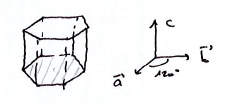
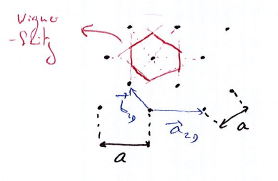

Surface de la zone de Wigner-Seitz :
$$
S_{W-S}^{(001)} \equiv 12 \frac{a^4/4 \tan \theta}{2} 
= \frac{3}{2}a^2 \tan \theta
$$
avec $\theta = \pi/6$ le plus petit angle angle entre la direction joignant deux plus proches voisins et celle joignant un noeud et son second plus proche voisin.

2. faces (110) :
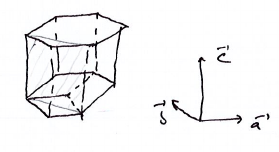
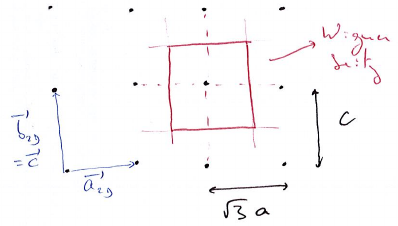
Surface de la zone de Wigner-Seitz :
$$
S_{W-S}^{(110)} = \sqrt{3}ac
$$

3. faces (100) :
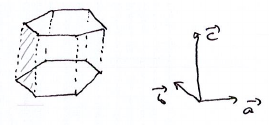
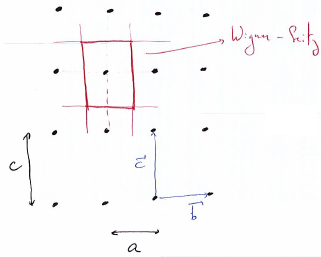
Surface de la zone de Wigner-Seitz :
$$
S_{W-S}^{(100)} = ac
$$

In [8]:
nS_001 = 2 * nu / (3 / 2 * a * a * np.tan (np.pi/6))
nS_110 = 2 * nu / (np.sqrt(3) * a * c)
nS_100 = 2 * nu / (a*c)
print (f'nS_001 = {nS_001:.2e} ')

nS_001 = 5.27e+15 


En reprenant le raisonnement du cas 3D, on exprime le rayon du disque de Fermi (à 2D) :
$$
k_F^{(2D)} = \sqrt {2\pi n_S}.
$$
On en déduit que l'énergie de Fermi (à 2D) s'exprime :
$$
E_F^{(2D)} = \frac{\hbar^2}{2m} 2\pi n_S.
$$

De même, on montre que la densité d'états superficielle $g_S$, c'est-à-dire dans un édifice cristallin à deux dimensions, s'exprime :
$$
g_S (k) = {L^2 k}{\pi}.
$$
On en déduit que la densité d'état à 2D en fonction de l'énergie s'exprime :
$$
g_S(E) = \frac{L^2 m}{\pi \hbar^2}.
$$

Enfin, l'énergie moyenne des électrons dans une monocouche de surface vaut
$$
\bar{E}^{(2D)} \equiv \int_0^{E_F} E\, g_S(E) \mathrm{d}E
 = \frac{E_F}{2}.
$$

In [9]:
EF2D = hbar*hbar/ m * np.pi * 

SyntaxError: invalid syntax (3754077224.py, line 1)